# Principal Component Analysis with Cancer Data

In [0]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [82]:
bcd_df_temp = pd.read_csv('https://raw.githubusercontent.com/GreatLearningAIML1/bangalore-aug19-batch-knightriderX/master/Residency5/breastcancerdata.csv?token=ABRYHI6TGXZJERYRC3EGBIC574UZA')

bcd_df_temp.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [84]:
bcd_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [85]:
bcd_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [86]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

bcd_df_temp.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [87]:
bcd_df_temp.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [88]:
bcd_df_temp[bcd_df_temp=='?'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             0 non-null float64
ClumpThickness                 0 non-null float64
Cell Size                      0 non-null float64
Cell Shape                     0 non-null float64
Marginal Adhesion              0 non-null float64
Single Epithelial Cell Size    0 non-null float64
Bare Nuclei                    16 non-null object
Normal Nucleoli                0 non-null float64
Bland Chromatin                0 non-null float64
Mitoses                        0 non-null float64
Class                          0 non-null float64
dtypes: float64(10), object(1)
memory usage: 60.2+ KB


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
bcd_df_temp = bcd_df_temp.applymap(lambda x: np.nan if x=="?" else x)

In [90]:
bcd_df_temp[bcd_df_temp=='?'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             0 non-null float64
ClumpThickness                 0 non-null float64
Cell Size                      0 non-null float64
Cell Shape                     0 non-null float64
Marginal Adhesion              0 non-null float64
Single Epithelial Cell Size    0 non-null float64
Bare Nuclei                    0 non-null object
Normal Nucleoli                0 non-null float64
Bland Chromatin                0 non-null float64
Mitoses                        0 non-null float64
Class                          0 non-null float64
dtypes: float64(10), object(1)
memory usage: 60.2+ KB


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [91]:
bcd_df_temp['Bare Nuclei'] = pd.to_numeric(bcd_df_temp['Bare Nuclei'])
bcd_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [92]:
bcd_df_temp['Bare Nuclei'].replace(np.nan,bcd_df_temp['Bare Nuclei'].median(),inplace=True)
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
bcd_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [94]:
bcd_df = bcd_df_temp.drop_duplicates()
bcd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
ID                             690 non-null int64
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null float64
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: float64(1), int64(10)
memory usage: 64.7 KB


In [95]:
bcd_df.drop(labels='ID',axis=1,inplace=True)
bcd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null float64
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: float64(1), int64(9)
memory usage: 59.3 KB


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


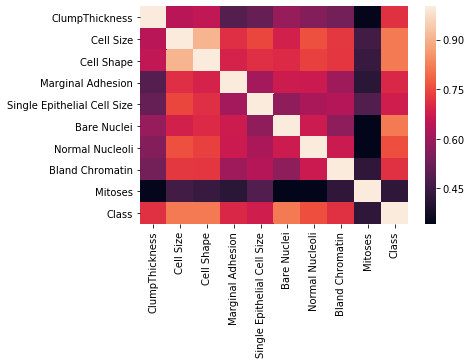

In [96]:
# Check for correlation of variable
sns.heatmap(bcd_df.corr())

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables



/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


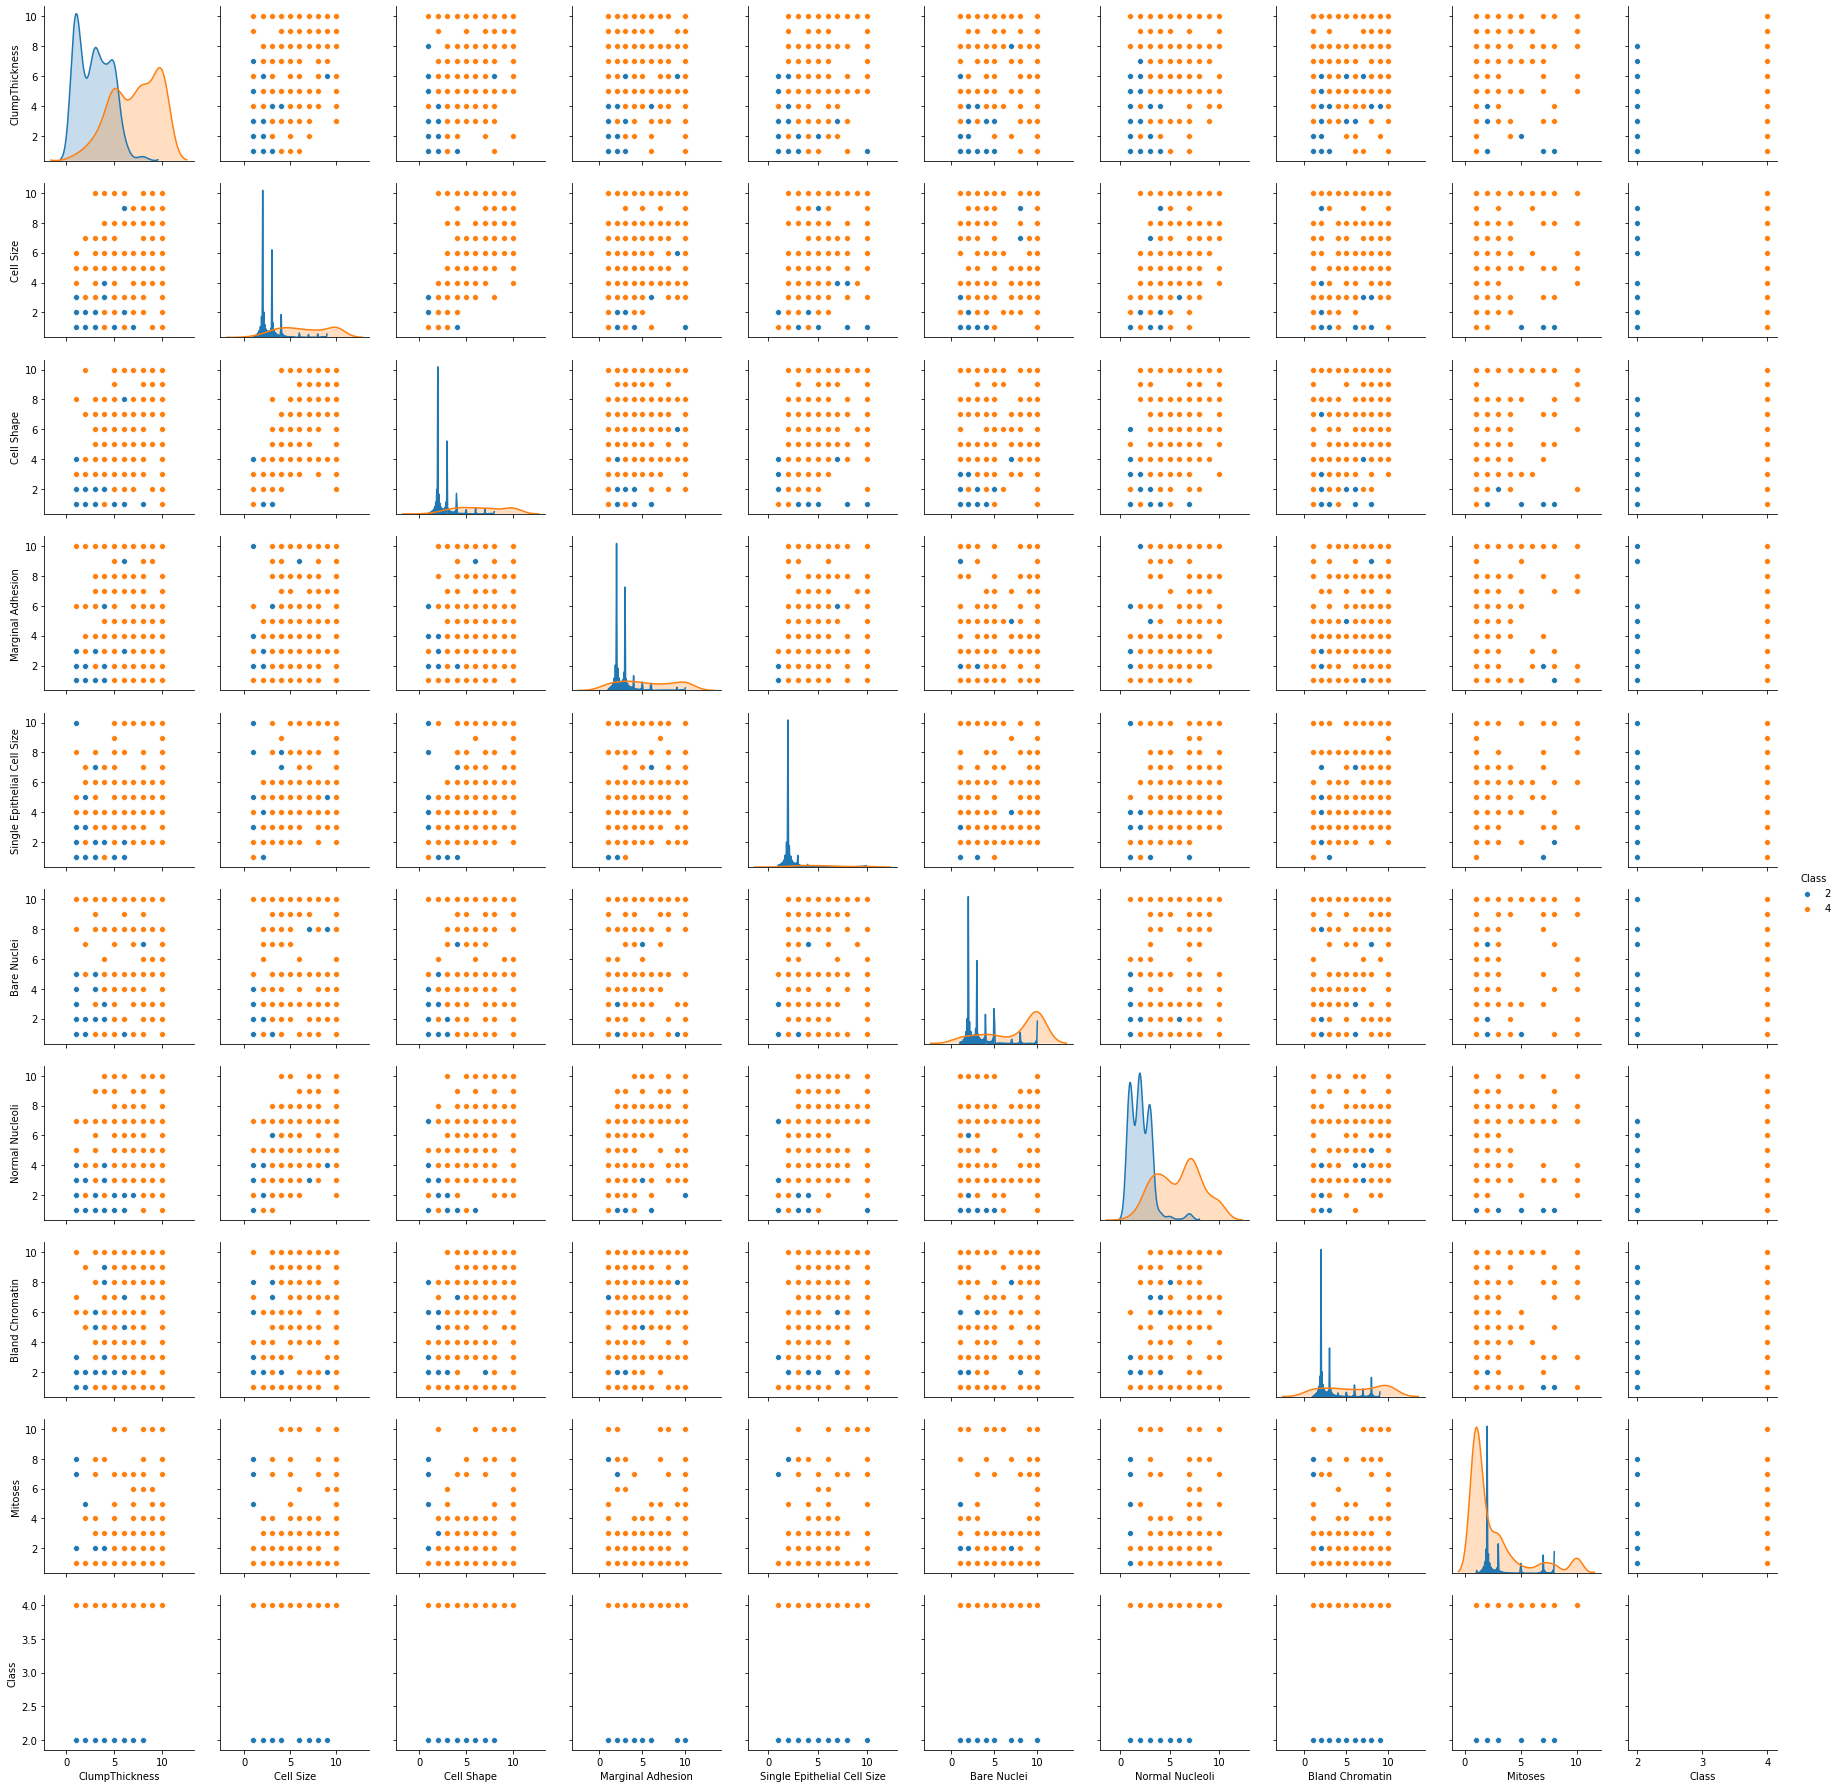

In [97]:
#Let us check for pair plots
sns.pairplot(bcd_df,hue='Class')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

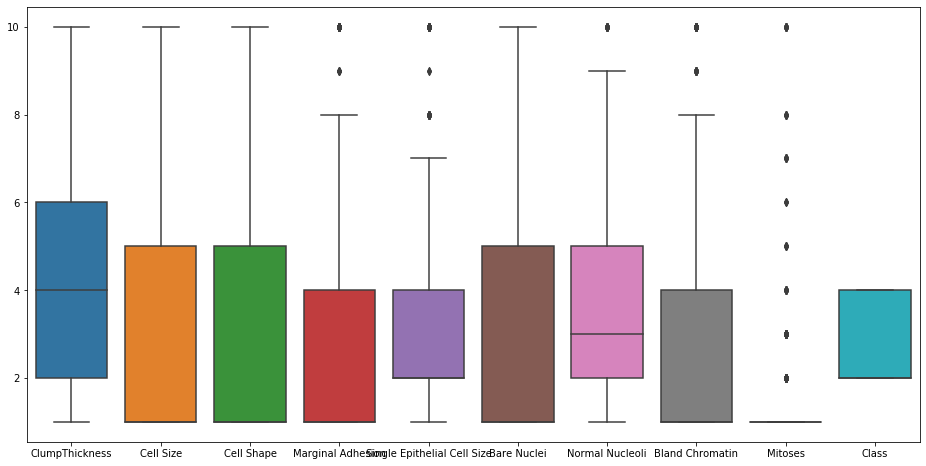

In [99]:
plt.figure(figsize=(16,8))
sns.boxplot(data=bcd_df)

In [100]:
bcd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,690.0,4.428986,2.817378,1.0,2.0,4.0,6.0,10.0
Cell Size,690.0,3.133333,3.042451,1.0,1.0,1.0,5.0,10.0
Cell Shape,690.0,3.204348,2.960844,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,690.0,2.827536,2.867787,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,690.0,3.213043,2.200964,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,690.0,3.482609,3.617064,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,690.0,3.436232,2.444060,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,690.0,2.885507,3.067682,1.0,1.0,1.0,4.0,10.0
Mitoses,690.0,1.594203,1.724230,1.0,1.0,1.0,1.0,10.0
Class,690.0,2.689855,0.951379,2.0,2.0,2.0,4.0,4.0


In [101]:
columns = bcd_df.columns
columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [102]:
for col in [ 'Marginal Adhesion',\
       'Single Epithelial Cell Size', 'Normal Nucleoli',\
       'Bland Chromatin', 'Mitoses']:
  #bcd_df = bcd_df.applymap(lambda x: bcd_df.describe().transpose()['75%'][col] if x>bcd_df.describe().transpose()['75%'][col] else x)

  bcd_df[col] = np.where( bcd_df[col]>bcd_df.describe().transpose()['75%'][col],bcd_df.describe().transpose()['75%'][col],bcd_df[col])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [103]:
bcd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,690.0,4.428986,2.817378,1.0,2.0,4.0,6.0,10.0
Cell Size,690.0,3.133333,3.042451,1.0,1.0,1.0,5.0,10.0
Cell Shape,690.0,3.204348,2.960844,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,690.0,2.014493,1.298573,1.0,1.0,1.0,4.0,4.0
Single Epithelial Cell Size,690.0,2.594203,0.964069,1.0,2.0,2.0,4.0,4.0
Bare Nuclei,690.0,3.482609,3.617064,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,690.0,2.885507,1.473498,1.0,2.0,3.0,5.0,5.0
Bland Chromatin,690.0,1.939130,1.308365,1.0,1.0,1.0,4.0,4.0
Mitoses,690.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Class,690.0,2.689855,0.951379,2.0,2.0,2.0,4.0,4.0


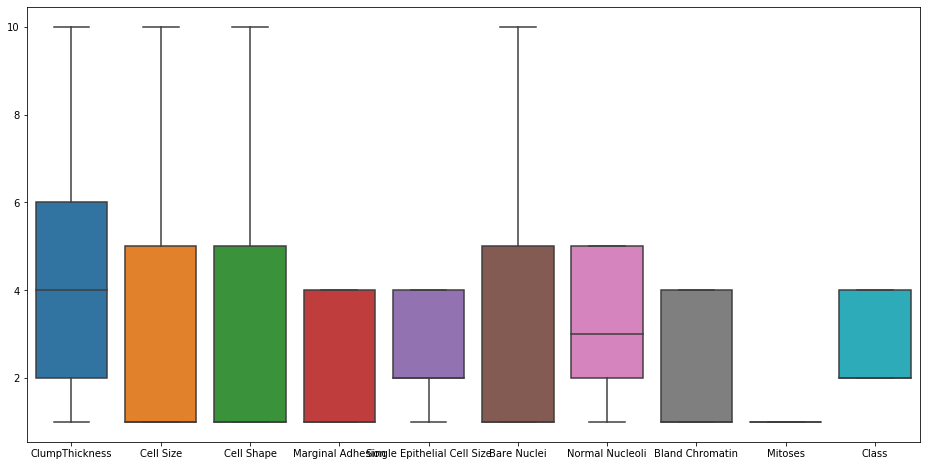

In [104]:
plt.figure(figsize=(16,8))
sns.boxplot(data=bcd_df)

In [0]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


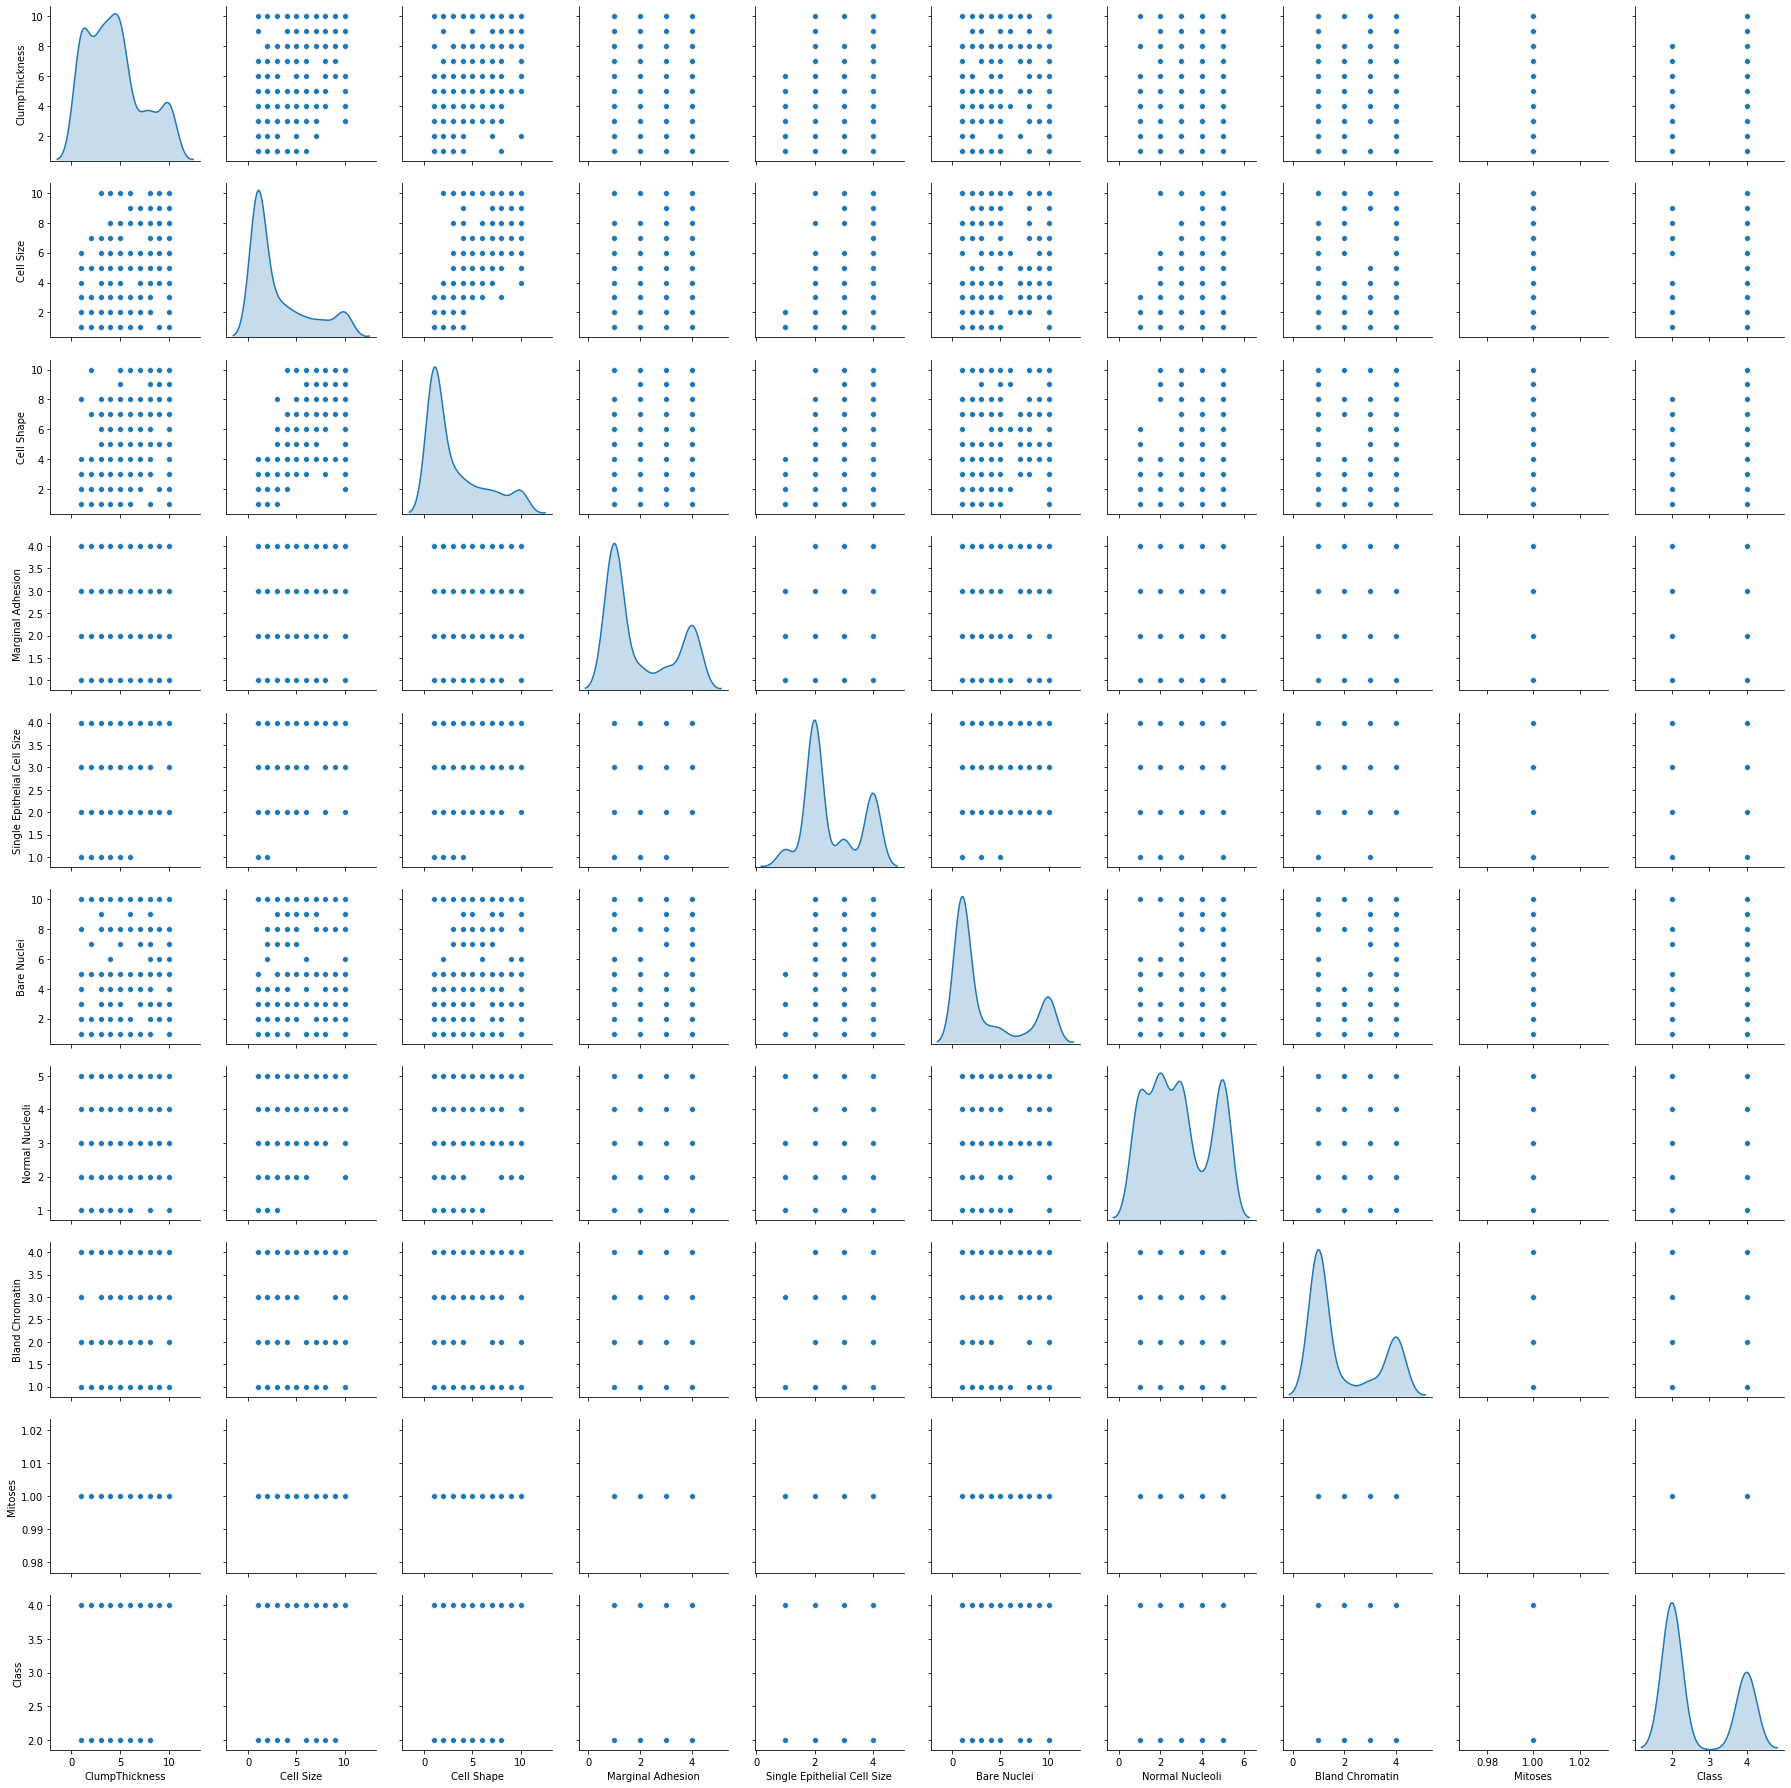

In [105]:
sns.pairplot(bcd_df, diag_kind='kde') 

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

In [0]:
X = bcd_df[bcd_df.columns[0:-1]]
Y = bcd_df["Class"]

In [110]:
# PCA
# Step 1 - Create covariance matrix
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('The Covariance Matrix is:\n', cov_matrix)

The Covariance Matrix is:
 [[1.00145138 0.64410677 0.65453792 0.55329897 0.58388619 0.59150555
  0.5762575  0.57214901 0.        ]
 [0.64410677 1.00145138 0.9066632  0.72204998 0.77320789 0.68556472
  0.71799205 0.72684553 0.        ]
 [0.65453792 0.9066632  1.00145138 0.7042574  0.75066888 0.70518656
  0.7033365  0.71910723 0.        ]
 [0.55329897 0.72204998 0.7042574  1.00145138 0.6955125  0.69693138
  0.65110177 0.65326018 0.        ]
 [0.58388619 0.77320789 0.75066888 0.6955125  1.00145138 0.68280195
  0.67626384 0.72360753 0.        ]
 [0.59150555 0.68556472 0.70518656 0.69693138 0.68280195 1.00145138
  0.6894512  0.64168219 0.        ]
 [0.5762575  0.71799205 0.7033365  0.65110177 0.67626384 0.6894512
  1.00145138 0.68697604 0.        ]
 [0.57214901 0.72684553 0.71910723 0.65326018 0.72360753 0.64168219
  0.68697604 1.00145138 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [113]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('The Eigen Vectors \n', eigenvectors)
print('The Eigen Values \n', eigenvalues)

The Eigen Vectors 
 [[ 0.31342808 -0.01445005  0.9124381   0.09860965  0.09082558 -0.0962776
   0.2022549   0.0293459   0.        ]
 [ 0.37937489 -0.72286891 -0.00583774 -0.36645941 -0.1142357  -0.02238539
  -0.35942354 -0.23763936  0.        ]
 [ 0.37726214  0.67979274  0.04498987 -0.32808981 -0.24972764  0.07025765
  -0.39784839 -0.2455702   0.        ]
 [ 0.34707615  0.04585818 -0.26752061  0.34722116  0.01102493 -0.59001151
   0.29016231 -0.50286784  0.        ]
 [ 0.36075167  0.06607829 -0.18881161 -0.21977369  0.7409318   0.390892
   0.2699902  -0.08288783  0.        ]
 [ 0.34766101 -0.08247825 -0.0846144   0.65544286 -0.27764678  0.59409238
  -0.07281375 -0.01512907  0.        ]
 [ 0.34846791  0.04202771 -0.13392983  0.21603513  0.27651374 -0.36232963
  -0.42887293  0.64847576  0.        ]
 [ 0.35015585 -0.00976042 -0.18189189 -0.32124942 -0.46226395 -0.01243881
   0.57035219  0.44929441  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        

# Q8 Find variance and cumulative variance by each eigen vector

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

# Q10 Find correlation between components and features

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.